In [1]:
# 2

import pandas as pandas
import numpy as numpy

import matplotlib.pyplot as plot
import matplotlib.ticker as ticker

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

from scipy.stats import pearsonr
from scipy.stats import linregress

champions = pandas.read_csv('datasets/Combined Traits.csv')

pandas.set_option('display.max_rows', None)

print(champions)

               name releasedate  popularity_spot  popularity  winrate  \
0            Aatrox   13/6/2013               17       0.107    0.495   
1              Ahri  14/12/2011               32       0.085    0.510   
2             Akali   11/5/2010               46       0.072    0.493   
3            Akshan   22/7/2021              162       0.017    0.486   
4           Alistar   21/2/2009               77       0.050    0.490   
5             Amumu   26/6/2009               24       0.094    0.534   
6            Anivia   10/7/2009              148       0.025    0.527   
7             Annie   21/2/2009              158       0.018    0.510   
8          Aphelios  11/12/2019              107       0.040    0.468   
9              Ashe   21/2/2009               16       0.108    0.496   
10     Aurelion Sol   24/3/2016              121       0.035    0.520   
11           Aurora   17/7/2024              106       0.040    0.483   
12             Azir   16/9/2014              140   

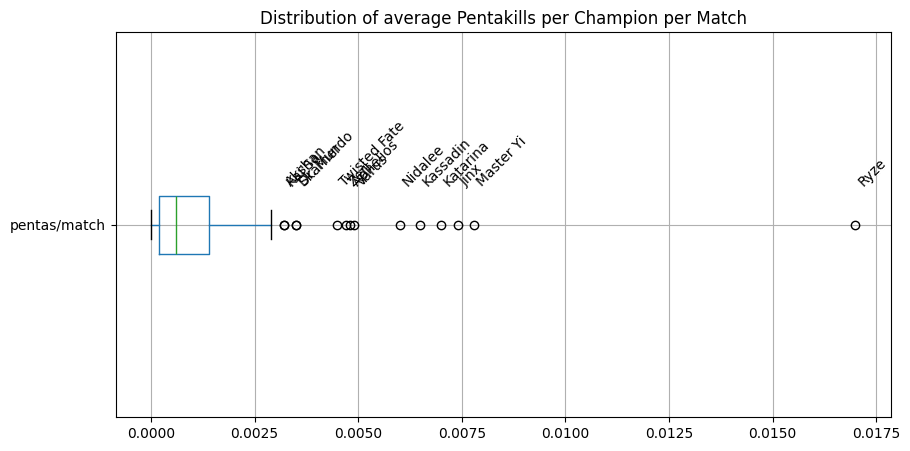

In [4]:
# 3.1

plot.figure(figsize=(10, 5))
plot.title('Distribution of average Pentakills per Champion per Match')

boxplot = champions.boxplot(column=['pentas/match'], vert=False)

Q1 = champions['pentas/match'].quantile(0.25)
Q3 = champions['pentas/match'].quantile(0.75)
IQR = Q3 - Q1
outliers = champions[(champions['pentas/match'] < (Q1 - 1.5 * IQR)) | (champions['pentas/match'] > (Q3 + 1.5 * IQR))]

for i in range(outliers.shape[0]):
    plot.annotate(outliers['name'].iloc[i],
                  xy=(outliers['pentas/match'].iloc[i], 1),
                  xytext=(outliers['pentas/match'].iloc[i], 1.1),
                  rotation=45)
    
plot.show()

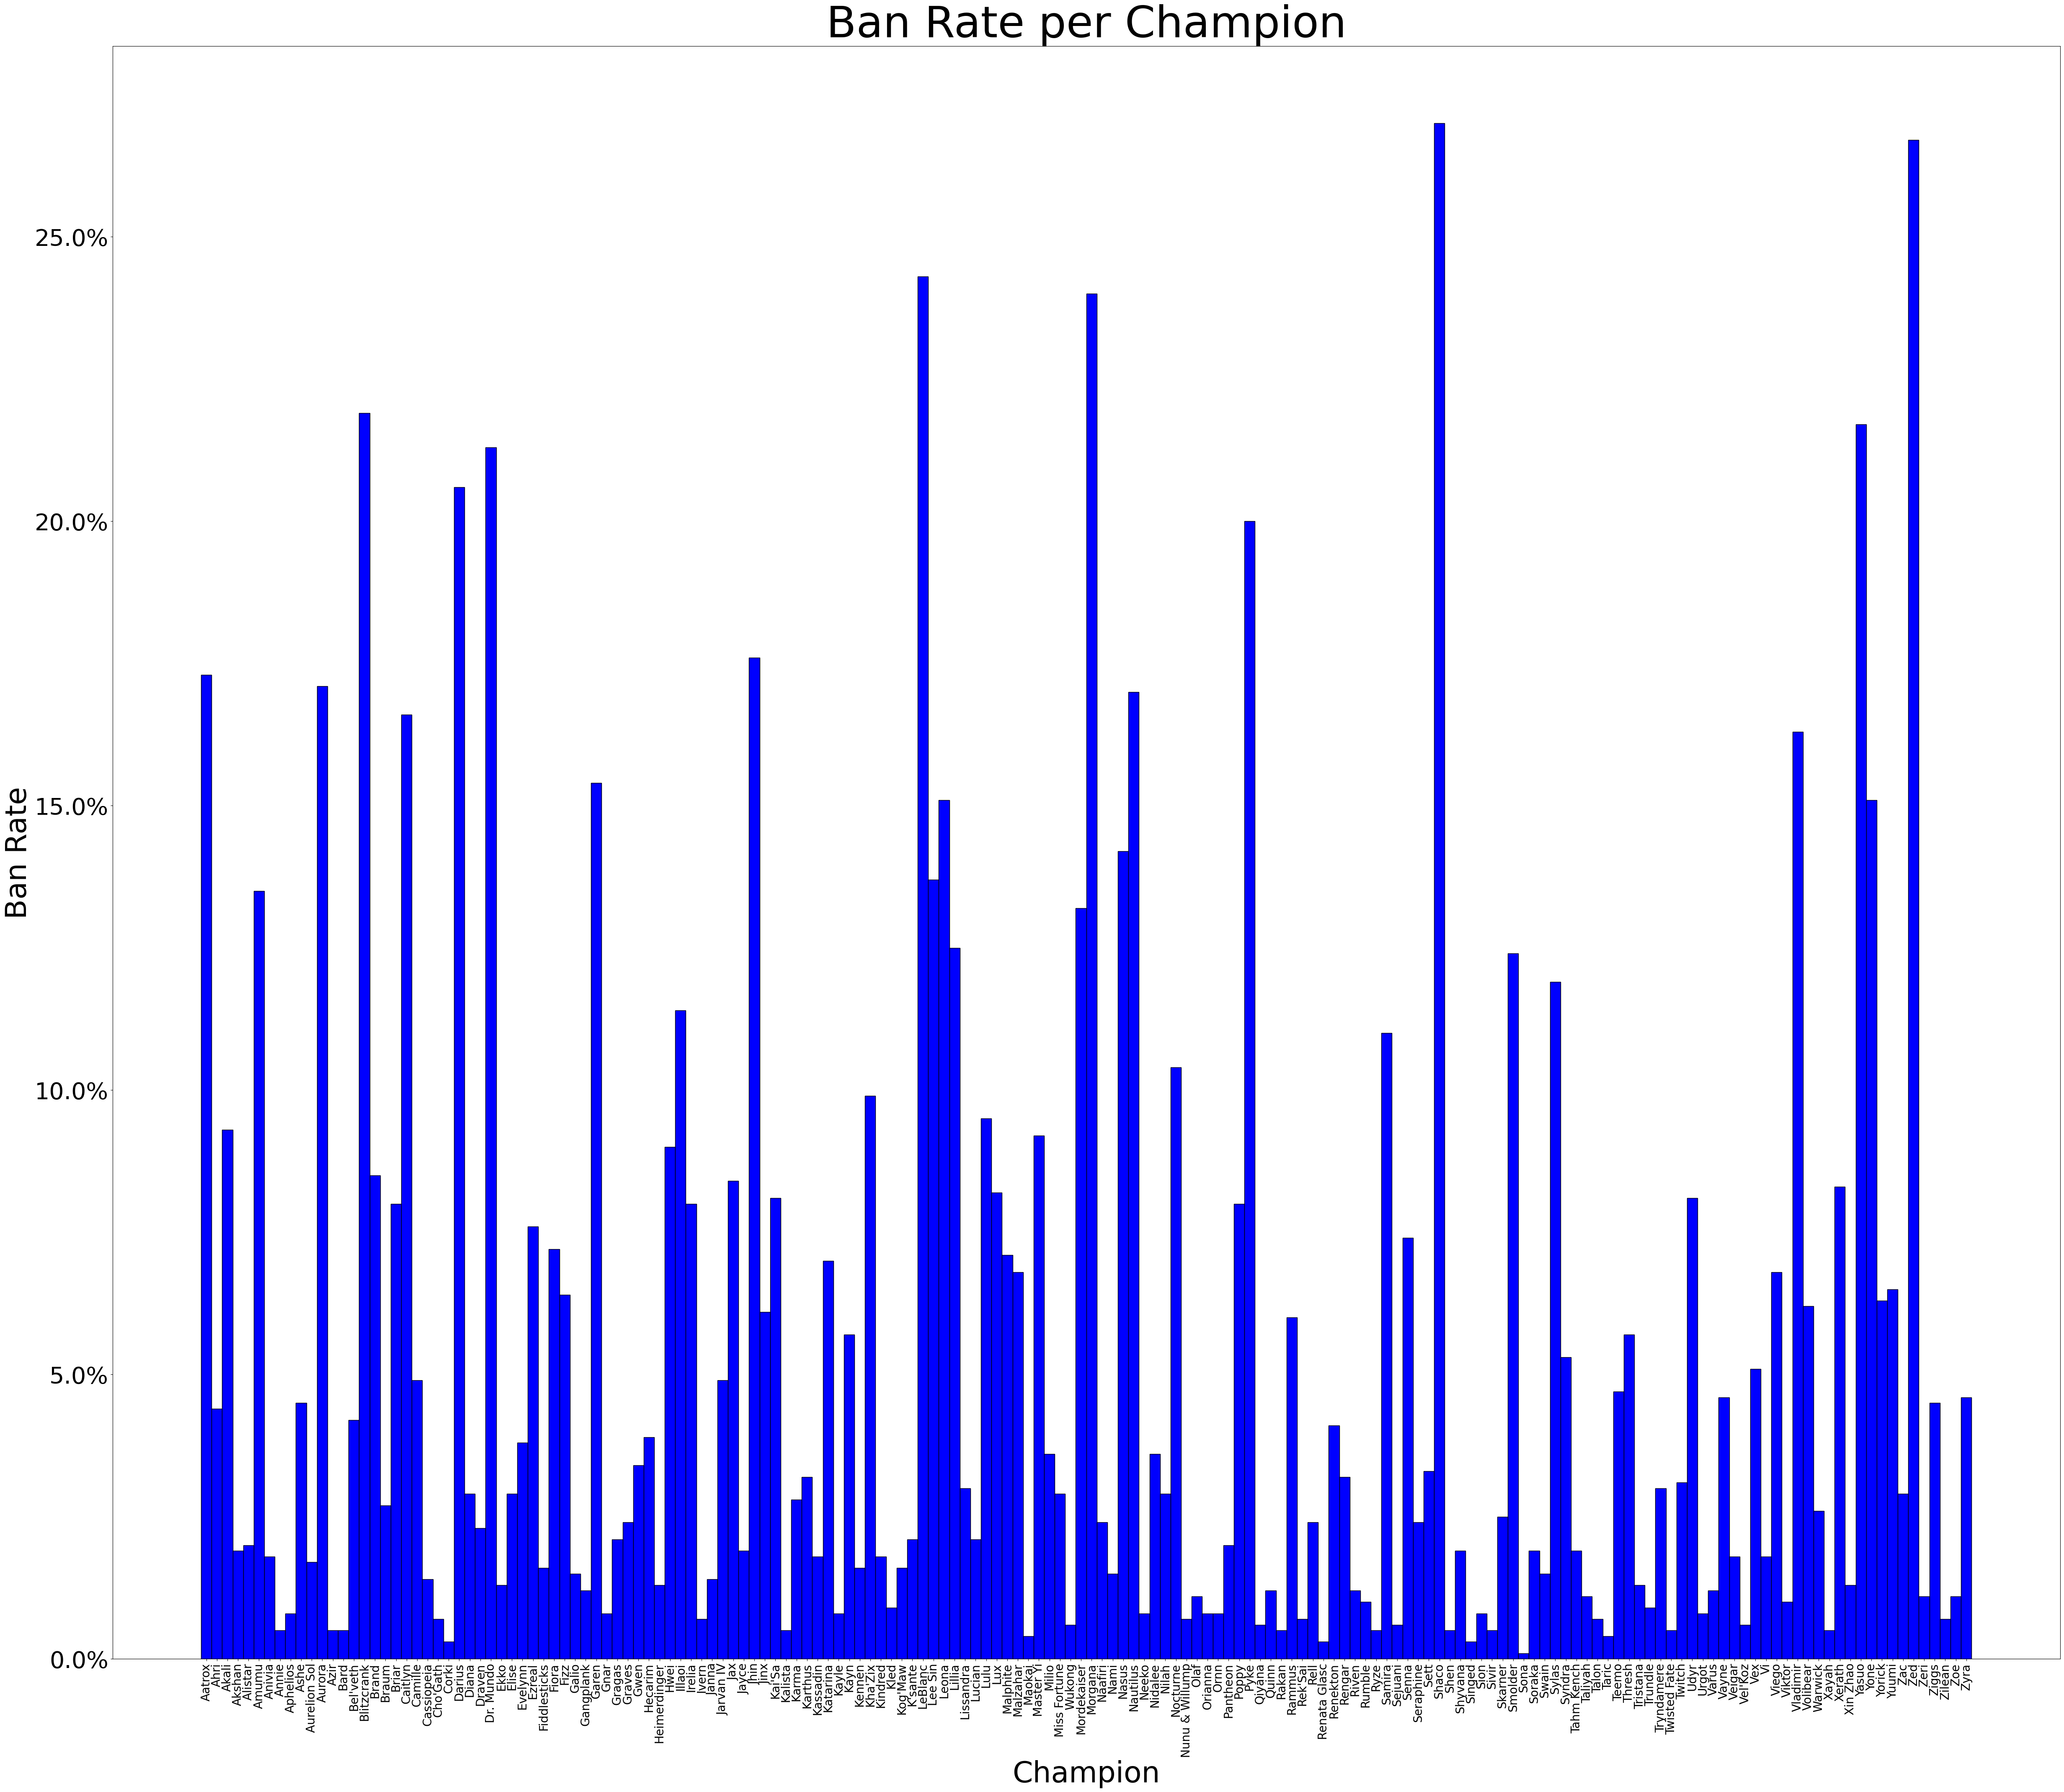

In [2]:
# 3.2

plot.figure(figsize=(60, 50))
plot.bar(champions['name'], champions['banrate'], color='blue', edgecolor='black', width=1)

plot.title('Ban Rate per Champion', fontsize=75)
plot.xlabel('Champion', fontsize=50)
plot.ylabel('Ban Rate', fontsize=50)
plot.xticks(rotation=90, fontsize=20)
plot.yticks(fontsize=40)
plot.gca().yaxis.set_major_formatter(ticker.PercentFormatter(1.0))

plot.show()

Correlation coefficient: 0.22424039269003804


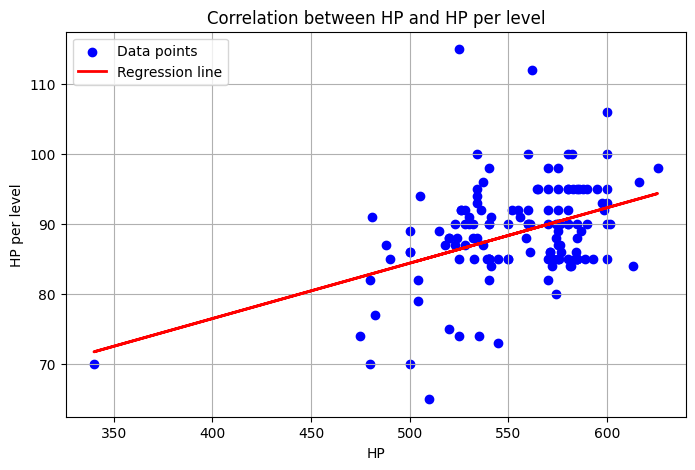

In [3]:
# 3.3

champions = champions.dropna()

x = champions['hp'].values.reshape(-1, 1)
y = champions['hpperlevel'].values

plot.figure(figsize=(8, 5))
plot.scatter(x, y, color='blue', label='Data points')

regressor = LinearRegression()
regressor.fit(x, y)
y_pred = regressor.predict(x)

plot.plot(x, y_pred, color='red', linewidth=2, label='Regression line')

plot.xlabel('HP')
plot.ylabel('HP per level')
plot.title('Correlation between HP and HP per level')
plot.legend(loc='upper left')
plot.grid(True)

correlation_coefficient, _ = pearsonr(champions['hp'], champions['attack'])
print(f'Correlation coefficient: {correlation_coefficient}')

plot.show()

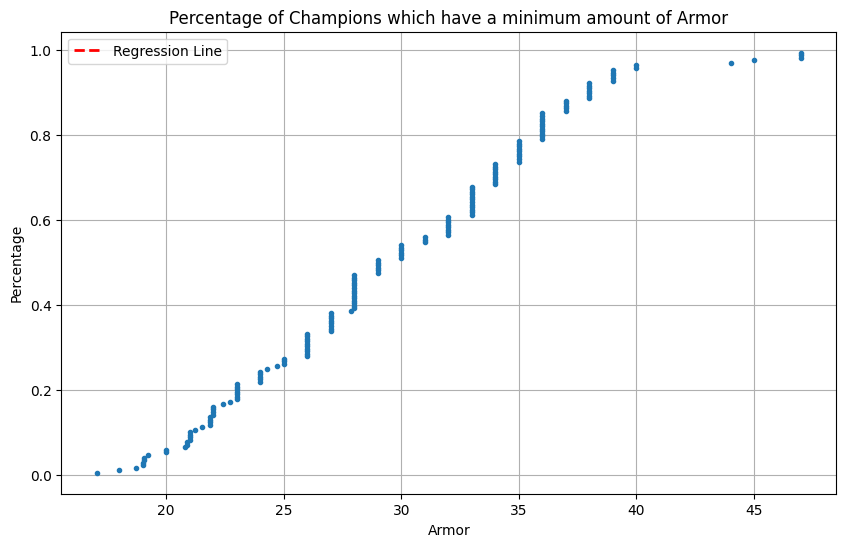

In [2]:
# 3.4

armorSorted = champions['armor'].sort_values()

cdf = numpy.arange(1, len(armorSorted) + 1) / len(armorSorted)

slope, intercept, r_value, p_value, std_err = linregress(armorSorted, cdf)

regressionLine = slope * armorSorted + intercept

plot.figure(figsize=(10, 6))
plot.plot(armorSorted, cdf, marker='.', linestyle='none')
plot.plot(armorSorted, regressionLine, label='Regression Line', linestyle='--', linewidth=2, color='red')
plot.xlabel('Armor')
plot.ylabel('Percentage')
plot.title('Percentage of Champions which have a minimum amount of Armor')
plot.legend()
plot.grid(True)
plot.show()

Train R^2: 0.6289161417214454
Test R^2: -0.08792356070661489


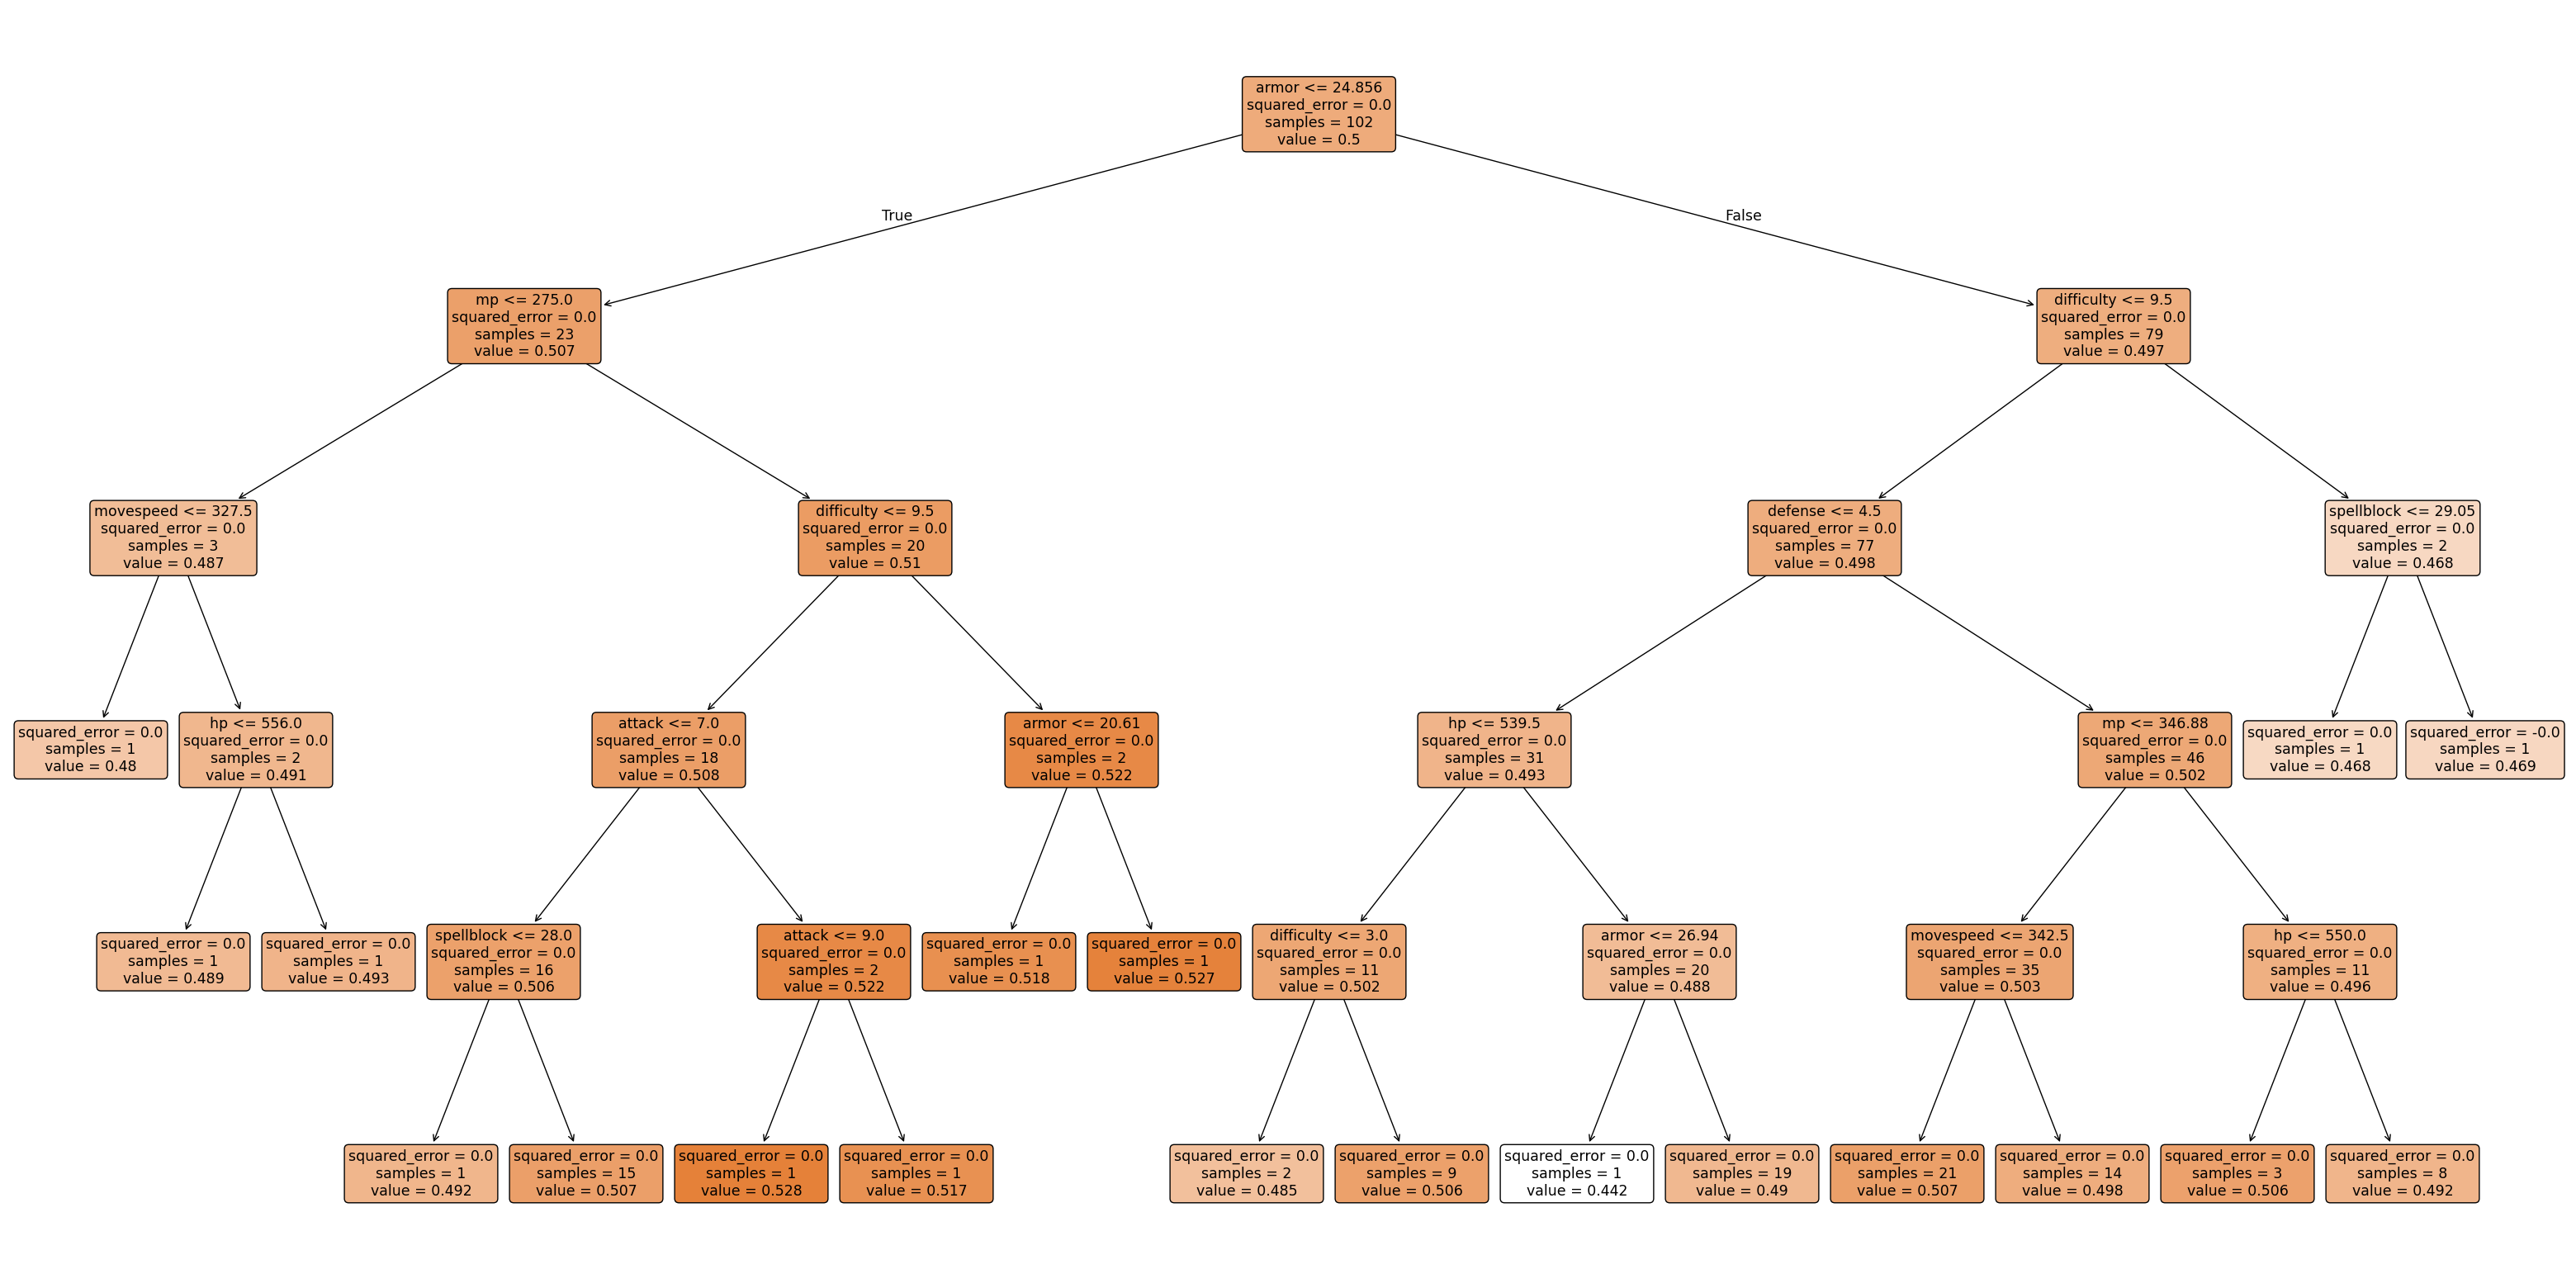

In [10]:
# 4.1

features = ['attack', 'defense', 'magic', 'difficulty','hp', 'mp', 'movespeed', 'armor', 'spellblock']
target = 'winrate'

champions = champions.dropna(subset=features + [target])

X = champions[features]
Y = champions[target]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

regressionTree = DecisionTreeRegressor(max_depth=5, random_state=42)
regressionTree.fit(X_train, Y_train)

print("Train R^2:", regressionTree.score(X_train, Y_train))
print("Test R^2:", regressionTree.score(X_test, Y_test))

plot.figure(figsize=(40, 20))
plot_tree(regressionTree, feature_names=features, filled=True, rounded=True)
plot.show()

Train R^2: 0.6681302276094967
Test R^2: 0.035691118311414805


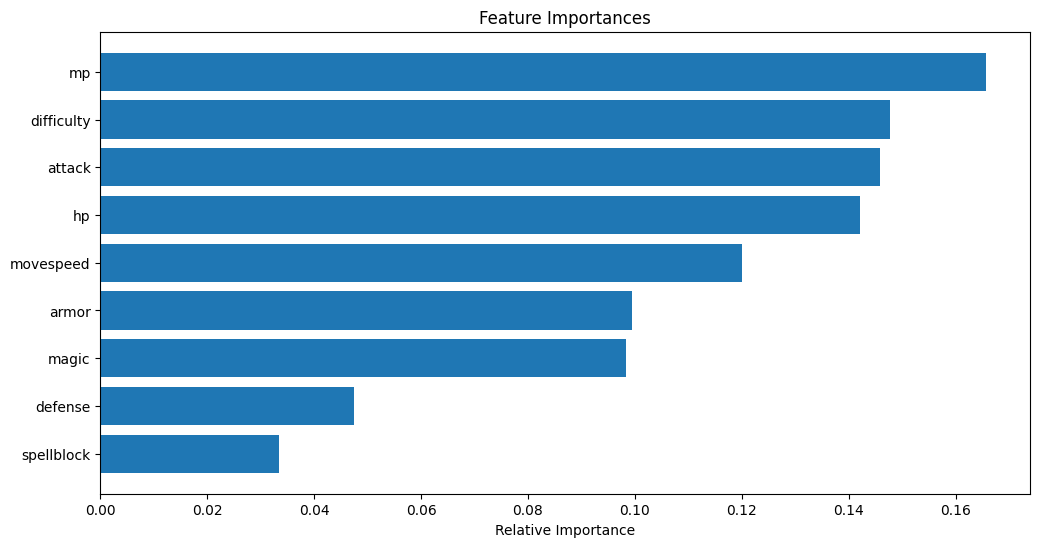

In [4]:
# 4.2

features = ['attack', 'defense', 'magic', 'difficulty','hp', 'mp', 'movespeed', 'armor', 'spellblock']
target = 'winrate'

champions = champions.dropna(subset=features + [target])

X = champions[features]
Y = champions[target]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, Y_train)

print("Train R^2:", rf_model.score(X_train, Y_train))
print("Test R^2:", rf_model.score(X_test, Y_test))

importances = rf_model.feature_importances_
indices = importances.argsort()

plot.figure(figsize=(12, 6))
plot.title("Feature Importances")
plot.barh(range(len(indices)), importances[indices], align="center")
plot.yticks(range(len(indices)), [features[i] for i in indices])
plot.xlabel("Relative Importance")
plot.show()